In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # отключаем предупреждения

**1. Выбор датасетов**: Студенты с нечетным порядковым номером в группе должны использовать про обучение студентов

In [2]:
data = pd.read_csv("./data/Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


**2. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили)**

Кодируем категориальный признак Extracurricular Activities

In [3]:
data["Extracurricular Activities"].replace({"Yes": 1, "No": 0}, inplace=True)

**Бонусное задание:** Ввести синтетический признак при построении модели

Синтетический признак - *свободное время студента*, оно будет равно 24 - <часы обучения> - <часы сна>

In [4]:
data["Free time"] = 24 - data["Hours Studied"] - data["Sleep Hours"]

Определение основных статистических показателей

In [5]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Free time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800,12.4765
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558,3.0970
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000,6.0000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000,10.0000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000,12.0000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000,15.0000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000,19.0000


Визуализация

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>,
        <Axes: title={'center': 'Extracurricular Activities'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>],
       [<Axes: title={'center': 'Free time'}>, <Axes: >, <Axes: >]],
      dtype=object)

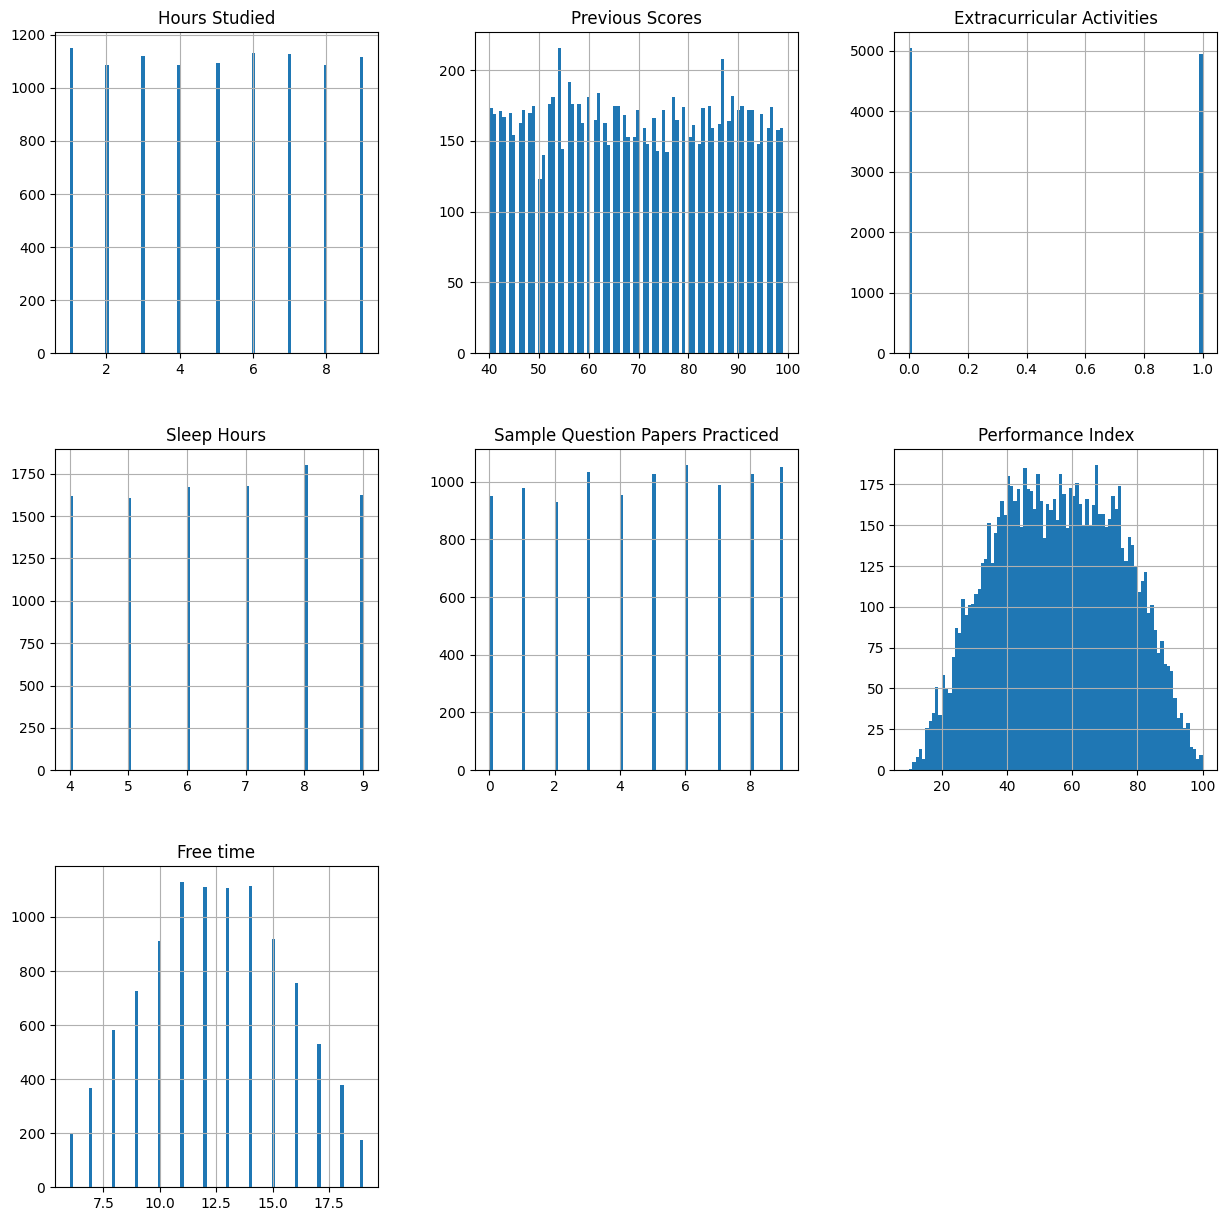

In [6]:
data.hist(bins = 90, figsize = (15, 15))

>> Количество:
|                                  |     0 |
|:---------------------------------|------:|
| Hours Studied                    | 10000 |
| Previous Scores                  | 10000 |
| Extracurricular Activities       | 10000 |
| Sleep Hours                      | 10000 |
| Sample Question Papers Practiced | 10000 |
| Performance Index                | 10000 |
| Free time                        | 10000 |


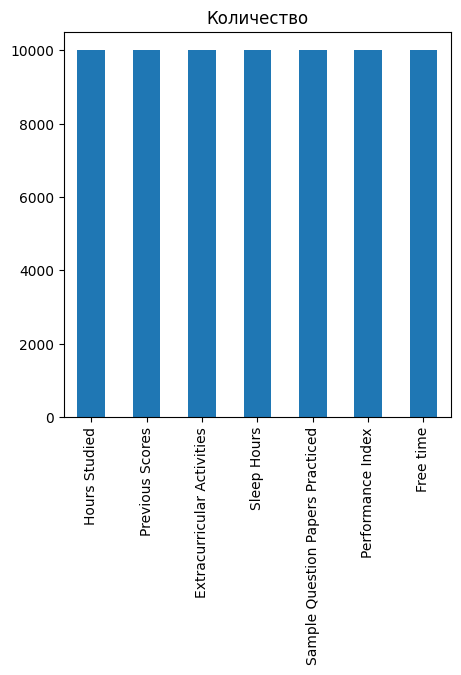

>> Средние значения:
|                                  |       0 |
|:---------------------------------|--------:|
| Hours Studied                    |  4.9929 |
| Previous Scores                  | 69.4457 |
| Extracurricular Activities       |  0.4948 |
| Sleep Hours                      |  6.5306 |
| Sample Question Papers Practiced |  4.5833 |
| Performance Index                | 55.2248 |
| Free time                        | 12.4765 |


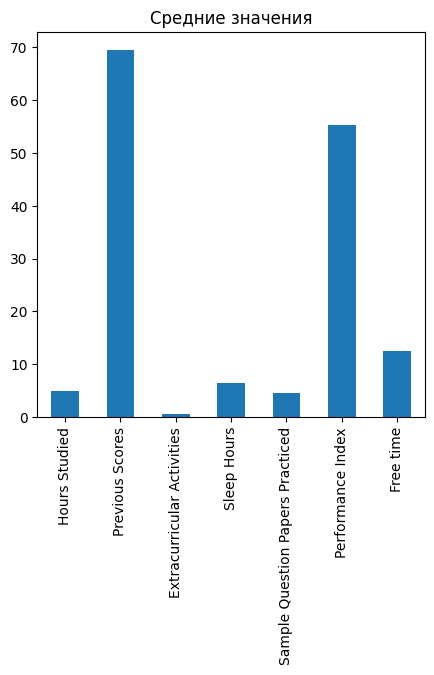

>> Стандартные отклонения:
|                                  |         0 |
|:---------------------------------|----------:|
| Hours Studied                    |  2.58931  |
| Previous Scores                  | 17.3432   |
| Extracurricular Activities       |  0.499998 |
| Sleep Hours                      |  1.69586  |
| Sample Question Papers Practiced |  2.86735  |
| Performance Index                | 19.2126   |
| Free time                        |  3.097    |


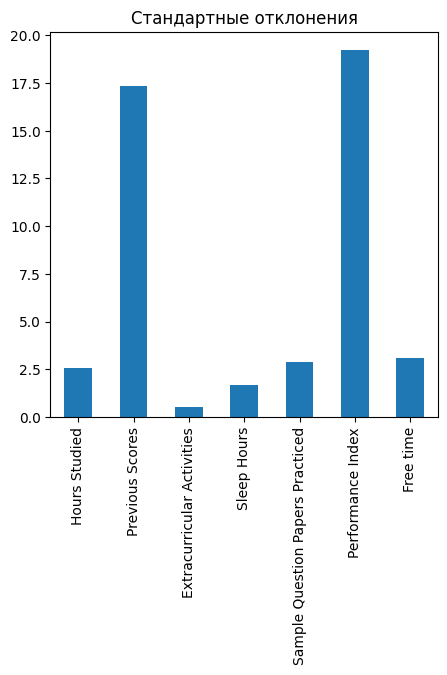

>> Минимум:
|                                  |   0 |
|:---------------------------------|----:|
| Hours Studied                    |   1 |
| Previous Scores                  |  40 |
| Extracurricular Activities       |   0 |
| Sleep Hours                      |   4 |
| Sample Question Papers Practiced |   0 |
| Performance Index                |  10 |
| Free time                        |   6 |


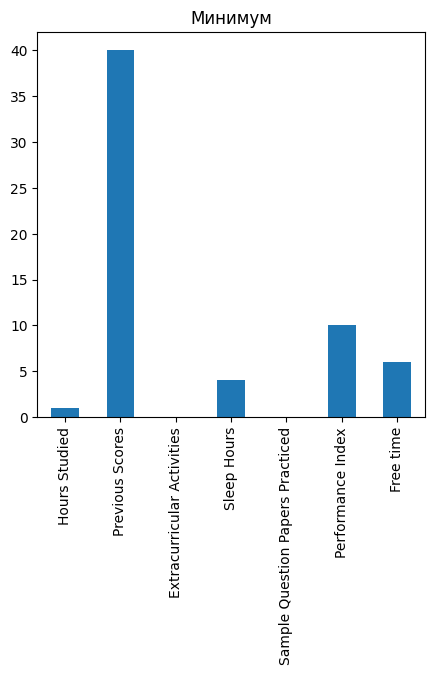

>> Максимум:
|                                  |   0 |
|:---------------------------------|----:|
| Hours Studied                    |   9 |
| Previous Scores                  |  99 |
| Extracurricular Activities       |   1 |
| Sleep Hours                      |   9 |
| Sample Question Papers Practiced |   9 |
| Performance Index                | 100 |
| Free time                        |  19 |


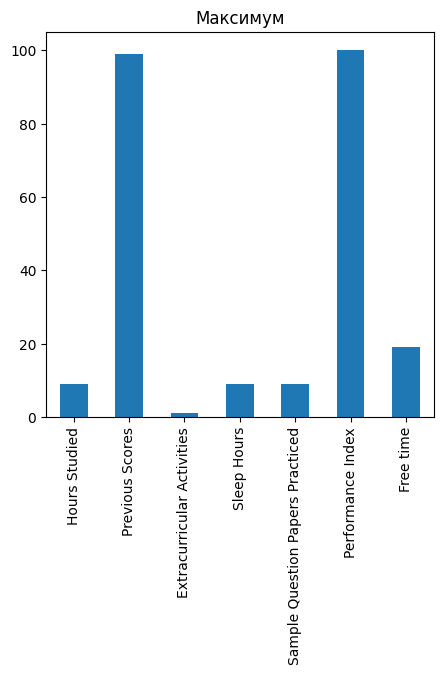

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]

print('>> Количество:')
data_count = data.count()
data_count.plot(kind='bar', title='Количество')
print(data_count.to_markdown())
plt.show()

print('>> Средние значения:')
data_means = data.mean()
data_means.plot(kind='bar', title='Средние значения')
print(data_means.to_markdown())
plt.show()

print('>> Стандартные отклонения:')
data_std = data.std()
data_std.plot(kind='bar', title='Стандартные отклонения')
print(data_std.to_markdown())
plt.show()

print('>> Минимум:')
data_min = data.min()
data_min.plot(kind='bar', title='Минимум')
print(data_min.to_markdown())
plt.show()

print('>> Максимум:')
data_max = data.max()
data_max.plot(kind='bar', title='Максимум')
print(data_max.to_markdown())
plt.show()

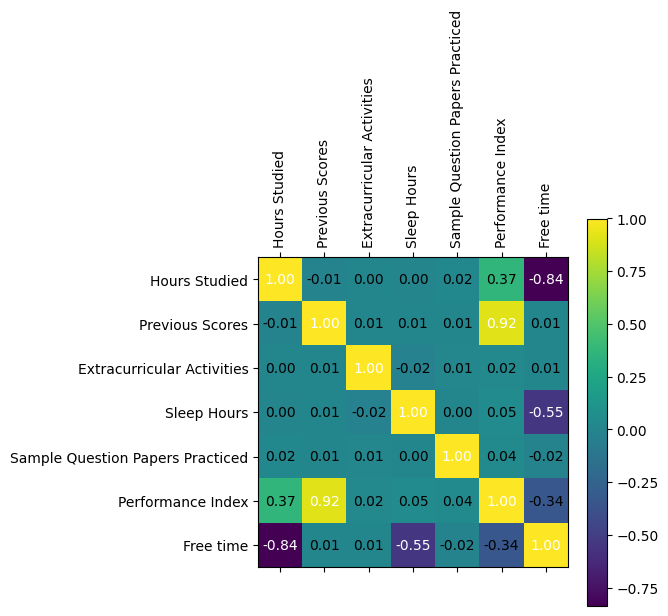

In [8]:
# Корреляционной матрица
corr = data.corr()
plt.matshow(corr)
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), data.columns, rotation=90)  # Добавим метки по оси X
plt.colorbar()
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')
plt.show()

Выявленны следующие корреляции с целевой переменной **Perfomance Index**:
1) Положительная (0.37) с переменной Hours Studied
2) Сильная положительная (0.92) с Previous Scores
3) Отрицательная (-0.34) с Free Time

**3. Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка**

In [9]:
# Нормируем данные
def normalize_data(d):
    cop_data = d.copy()
    for column in d.columns:
        col_min = min(d[column])
        col_max = max(d[column])
        cop_data[column] = ((d[column] - col_min) / (col_max - col_min))
    return cop_data


norm_data = normalize_data(data)
norm_data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Free time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499113,0.499080,0.494800,0.506120,0.509256,0.502498,0.498192
std,0.323664,0.293952,0.499998,0.339173,0.318594,0.213473,0.238231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.237288,0.000000,0.200000,0.222222,0.333333,0.307692
50%,0.500000,0.491525,0.000000,0.600000,0.555556,0.500000,0.461538
75%,0.750000,0.762712,1.000000,0.800000,0.777778,0.677778,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


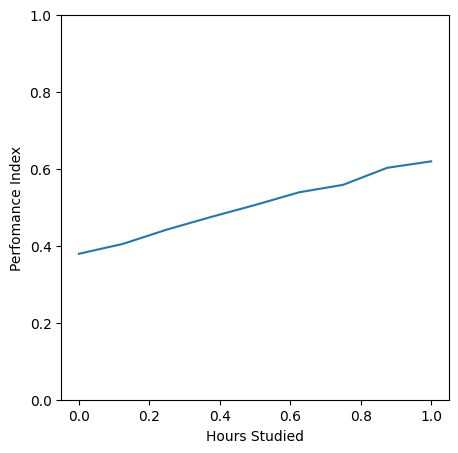

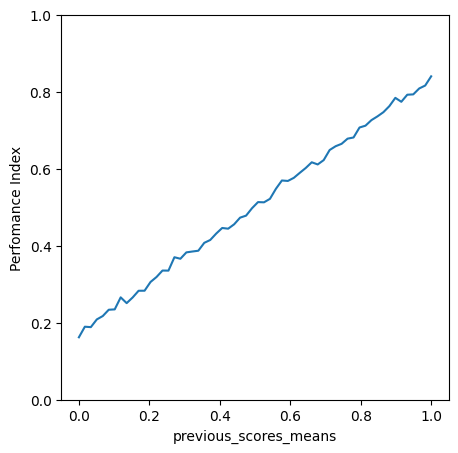

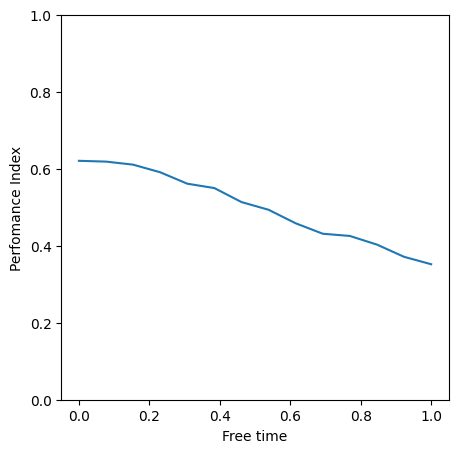

In [10]:
# norm_data['Hours Studied Group'] = pd.cut(norm_data['Hours Studied'], bins=3)
hours_studied_means = norm_data.groupby("Hours Studied").mean()
plt.plot(hours_studied_means["Performance Index"], scaley=False)
plt.xlabel("Hours Studied")
plt.ylabel("Perfomance Index")
plt.show()

previous_scores_means = norm_data.groupby("Previous Scores").mean()
plt.plot(previous_scores_means["Performance Index"], scaley=False)
plt.xlabel("previous_scores_means")
plt.ylabel("Perfomance Index")
plt.show()

free_time_means = norm_data.groupby("Free time").mean()
plt.plot(free_time_means["Performance Index"], scaley=False)
plt.xlabel("Free time")
plt.ylabel("Perfomance Index")
plt.show()

**4. Разделите данные на обучающий и тестовый наборы данных**

In [11]:
train_coef = 0.8
random_state = 52

# Задаём признаки и целевую переменную
feat = norm_data.drop('Performance Index', axis=1)
targ = norm_data['Performance Index']

# Набор данных для обучения
train = norm_data.sample(frac=train_coef, random_state=random_state)
# Набор данных для проверки модели
test = norm_data.drop(train.index)

train_x = train.drop('Performance Index', axis=1)
train_y = train["Performance Index"]
print(f"Train size: {len(train_y)}")

test_x = test.drop('Performance Index', axis=1)
test_y = test["Performance Index"]
print(f"Test size: {len(test_y)}")

Train size: 8000
Test size: 2000


**5. Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов**

Находим вектор весов W:

![Вектор весов W](photo_1_2024-11-20_21-40-04.jpg)

In [12]:
# Добавляем дополнительный столбец с единицами в матрицу признаков, чтобы учесть свободный член
def add_ones(X):
    X = np.array(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return np.concatenate((np.ones((len(X), 1)), X), axis=1)


# Вычисляем вектор коэффициентов w
def fit_model(fit_x, fit_y):
    x = add_ones(np.array(fit_x))
    y = np.array(fit_y)
    w = np.linalg.inv((x.T @ x)) @ x.T @ y
    return w


# Гадаем
def predict(X, w):
    return np.array(add_ones(X)) @ w

**6. Постройте три модели с различными наборами признаков**

In [13]:
model_train_0 = train_x.copy()
model_test_0 = test_x.copy()

model_train_1 = train_x.copy()["Hours Studied"]
model_test_1 = test_x.copy()["Hours Studied"]

model_train_2 = train_x.copy()["Previous Scores"]
model_test_2 = test_x.copy()["Previous Scores"]

model_train_3 = train_x.copy()["Free time"]
model_test_3 = test_x.copy()["Free time"]

model_train_4 = train_x[["Previous Scores", "Free time", "Hours Studied"]].copy()
model_test_4 = test_x[["Previous Scores", "Free time", "Hours Studied"]].copy()

**7. Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным**

Введём коэффициент детерминации:

![Формула коэффициента детерминации](photo_2_2024-11-20_21-40-04.jpg)

In [14]:
# Функция для определния коэффициента детерминации
def count_determination(true_y, predicted_y):
        mean_y = np.mean(true_y)
        predicted_sum = np.sum((true_y - predicted_y) ** 2)
        true_sum = np.sum((true_y - mean_y) ** 2)
        return 1 - predicted_sum / true_sum

Проведём оценку производительности для каждой из моделей

In [15]:
vector_0 = fit_model(model_train_0.values, train_y)  # Обучение
predicted_0 = predict(model_test_0.values, vector_0)   # Предсказание значений
r2_0 = count_determination(test_y, predicted_0) # Оценка производительности
print(f"R^2 по всем признакам: {r2_0}")

R^2 по всем признакам: 0.7477869587496186


In [16]:
vector_1 = fit_model(model_train_1.values, train_y)  # Обучение
predicted_1 = predict(model_test_1.values, vector_1)   # Предсказание значений
r2_1 = count_determination(test_y, predicted_1) # Оценка производительности
print(f"R^2 по Hours Studied: {r2_1}")

R^2 по Hours Studied: 0.1607573946028309


In [17]:
vector_2 = fit_model(model_train_2.values, train_y)  # Обучение
predicted_2 = predict(model_test_2.values, vector_2)   # Предсказание значений
r2_2 = count_determination(test_y, predicted_2) # Оценка производительности
print(f"R^2 по Previous Scores: {r2_2}")

R^2 по Previous Scores: 0.843786230587793


In [18]:
vector_3 = fit_model(model_train_3.values, train_y)  # Обучение
predicted_3 = predict(model_test_3.values, vector_3)   # Предсказание значений
r2_3 = count_determination(test_y, predicted_3) # Оценка производительности
print(f"R^2 по Free time: {r2_3}")

R^2 по Free time: 0.1328609312654342


In [19]:
vector_4 = fit_model(model_train_4.values, train_y)  # Обучение
predicted_4 = predict(model_test_4.values, vector_4)   # Предсказание значений
r2_4 = count_determination(test_y, predicted_4) # Оценка производительности
print(f'R^2 по Previous Scores, Free time, Hours Studied: {r2_4}')

R^2 по Previous Scores, Free time, Hours Studied: 0.9881693065141347


**8. Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели**

Самый точную корреляцию выдаёт признак Previous Scores, добавляя к нему Free time, Hours Studied (другие признаки, дающие корреляцию) мы улучшаем результат предсказания и добиваемся поразительной точности в 98.816%